Input size is (1, 28, 28)


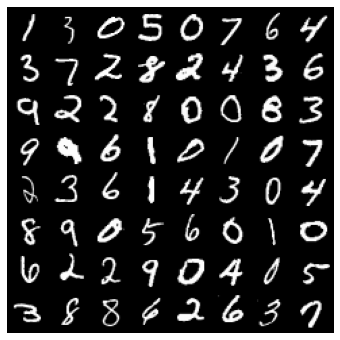

In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.utils as vutils
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
data = datasets.MNIST(root='./data',download=True, transform=transform)
img_shape = (data[1][0].size(0), data[1][0].size(1), data[1][0].size(2))
print(f'Input size is {img_shape}')

# Prepare dataloader for training
batch_size = 256
dataloader = DataLoader(data, batch_size=batch_size, shuffle=True)

# Plot some training images
real_batch = next(iter(dataloader))
plt.figure(figsize=(6,6))
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [2]:
###########################
### Vanilla GAN Training
###########################

from GAN import Generator, Discriminator, Train

dim_latent = 100
lr = 0.001
cuda = torch.cuda.is_available()
device = torch.device("cuda" if cuda else "cpu")

# Initialize generator and discriminator
G = Generator(img_shape=img_shape, dim_latent=dim_latent, g_dims=[128,256,512,1024]).to(device)
D = Discriminator(img_shape=img_shape, d_dims=[512, 256]).to(device)

optimizer_G = torch.optim.Adam(G.parameters(), lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(D.parameters(), lr=lr, betas=(0.5, 0.999))

Train(epoch=50, dataloader=dataloader, cuda=cuda, G=G, D=D, 
      optimizer_G=optimizer_G, optimizer_D=optimizer_D)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 0 / D loss: 1.2502 / G loss: 0.8975
Epoch 1 / D loss: 1.4185 / G loss: 0.7980
Epoch 2 / D loss: 1.3029 / G loss: 0.7335
Epoch 3 / D loss: 0.9892 / G loss: 1.5244
Epoch 4 / D loss: 1.0902 / G loss: 1.1399
Epoch 5 / D loss: 1.1834 / G loss: 1.2031
Epoch 6 / D loss: 1.2663 / G loss: 1.0731
Epoch 7 / D loss: 1.1870 / G loss: 1.1078
Epoch 8 / D loss: 1.2109 / G loss: 1.0945
Epoch 9 / D loss: 1.1774 / G loss: 1.1917
Epoch 10 / D loss: 1.3135 / G loss: 1.2494
Epoch 11 / D loss: 1.1913 / G loss: 1.0023
Epoch 12 / D loss: 1.1872 / G loss: 1.3470
Epoch 13 / D loss: 1.3167 / G loss: 0.9936
Epoch 14 / D loss: 1.2931 / G loss: 0.7864
Epoch 15 / D loss: 1.3992 / G loss: 1.0376
Epoch 16 / D loss: 1.2834 / G loss: 0.8665
Epoch 17 / D loss: 1.2833 / G loss: 0.6645
Epoch 18 / D loss: 1.3087 / G loss: 0.8775
Epoch 19 / D loss: 1.3310 / G loss: 0.9436
Epoch 20 / D loss: 1.3141 / G loss: 0.6887
Epoch 21 / D loss: 1.3536 / G loss: 0.8276
Epoch 22 / D loss: 1.3151 / G loss: 1.1457
Epoch 23 / D loss: 1.

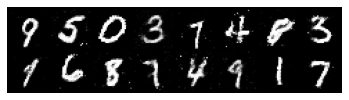

In [5]:
##################################
### Examples of Generated Images
##################################

G.eval()
z = torch.FloatTensor(np.random.normal(0, 1, (16, dim_latent))).to(device)
fake = G(z).detach().cpu()
plt.axis("off")
plt.imshow(np.transpose(vutils.make_grid(fake, padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()